In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2,
random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all,
test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape, x_val.shape)

(364, 30) (91, 30)


[2 2 3 4 4]
10


In [15]:
class SingleLayer:
  def __init__(self, learning_rate=0.1, l2=0): # Add l2 as an argument with a default value
      self.w = None
      self.b = None
      self.losses = []
      self.w_history = []
      self.lr = learning_rate
      self.l2 = l2

  def forpass(self, x):
   z = np.dot(x, self.w) + self.b # 선형 출력을 계산합니다.
   return z

  def backprop(self, x, err):
   m = len(x)
   w_grad = np.dot(x.T, err) / m # 가중치에 대한 그레이디언트를 계산합니다.
   b_grad = np.sum(err) / m # 절편에 대한 그레이디언트를 계산합니다.
   return w_grad, b_grad

  def predict(self, x):
   z = self.forpass(x) # 정방향 계산을 수행합니다.
   return z > 0 # 스텝 함수를 적용합니다.

  def update_val_loss(self, x_val, y_val):
   z = self.forpass(x_val) # 정방향 계산을 수행합니다.
   a = self.activation(z) # 활성화 함수를 적용합니다.
   a = np.clip(a, 1e-10, 1-1e-10) # 출력 값을 클리핑합니다.
 # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
   val_loss = np.sum(-(y_val*np.log(a) + (1-y_val)*np.log(1-a)))
   self.val_losses.append((val_loss + self.reg_loss()) / len(y_val))

In [ ]:
def fit(self, x, y, epochs=100):
    if isinstance(x, (pd.DataFrame, pd.Series)):
        x = x.values
    if isinstance(y, (pd.DataFrame, pd.Series)):
        y = y.values
    self.w = np.ones(x.shape[1]) # 가중치를 초기화
    self.b = 0 # 절편을 초기화
    for i in range(epochs): # epochs만큼 반복
      loss = 0
# 인덱스를 섞습니다
      indexes = np.random.permutation(np.arange(len(x)))
      for i in indexes: # 모든 샘플에 대해 반복
        z = self.forpass(x[i]) # 정방향 계산
        a = self.activation(z) # 활성화 함수 적용
        err = -(y[i] - a) # 오차 계산
        w_grad, b_grad = self.backprop(x[i], err) # 역방향 계산
        self.w -= w_grad # 가중치 업데이트
        self.b -= b_grad # 절편 업데이트
# 안전한 로그 계산을 위하여 클리핑한 후 손실을 누적함
        a = np.clip(a, 1e-10, 1-1e-10)
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
# 에포크마다 평균 손실을 저장
      self.losses.append(loss/len(y))

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train) # 훈련 데이터 표준화
x_val_scaled = scaler.transform(x_val) # 검증 데이터 표준화

In [16]:
single_layer = SingleLayer(l2=0.01)
single_layer.fit(x_train_scaled, y_train,x_val=x_val_scaled, y_val=y_val, epochs=10000)
print(single_layer.score(x_val_scaled, y_val))

AttributeError: 'SingleLayer' object has no attribute 'fit'

AttributeError: 'SingleLayer' object has no attribute 'val_losses'

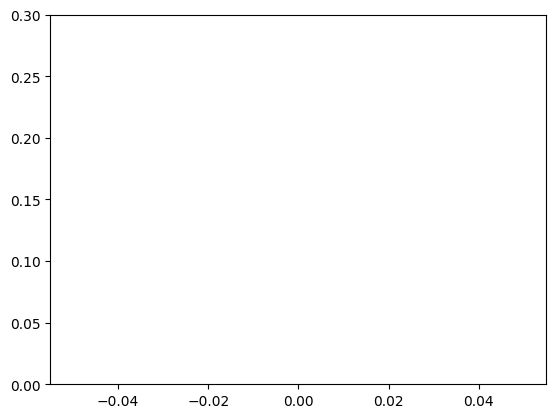

In [17]:
plt.ylim(0, 0.3)
plt.plot(single_layer.losses)
plt.plot(single_layer.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [18]:
w2 = []
w3 = []
for w in single_layer.w_history:
w2.append(w[2])
w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

IndentationError: expected an indented block after 'for' statement on line 3 (<ipython-input-18-b510de45677e>, line 4)

In [ ]:
class DualLayer(SingleLayer):
def __init__(self, units=10, learning_rate=0.1, l1=0, l2=0):
self.units = units # 은닉층의 뉴런 개수
self.w1 = None # 은닉층의 가중치
self.b1 = None # 은닉층의 절편
self.w2 = None # 출력층의 가중치
self.b2 = None # 출력층의 절편
self.a1 = None # 은닉층의 활성화 출력
self.losses = [] # 훈련 손실
self.val_losses = [] # 검증 손실
self.lr = learning_rate # 학습률
self.l1 = l1 # L1 손실 하이퍼파라미터
self.l2 = l2 # L2 손실 하이퍼파라미터
